In [617]:
import pandas as pd


In [682]:
df=pd.read_csv('/Users/hindsalem/Desktop/Project_Jarir_Bookstore/laptop_Data.csv')
df

,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,...,768.1,900,1080,1200,1440.1,1504,1600.1,1800,1824,2160.1
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1005,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


We're going to try out the validation process to choose between 3 models: simple linear regression, linear regression with ridge regularization, and linear regression with 1nd degree polynomial features.

## Method 1: Train / Validation / Test¶


In [619]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures



In [620]:
X,y=df.drop('Price',axis=1), df['Price']
X

,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,...,768.1,900,1080,1200,1440.1,1504,1600.1,1800,1824,2160.1
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1005,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [621]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)


In [622]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=.25,random_state=10)

In [623]:
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)
print(y_val.shape)

(806, 98)
(202, 98)
(806,)
(202,)
(202,)


####  First model simple linear regression :

In [624]:
LR= LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

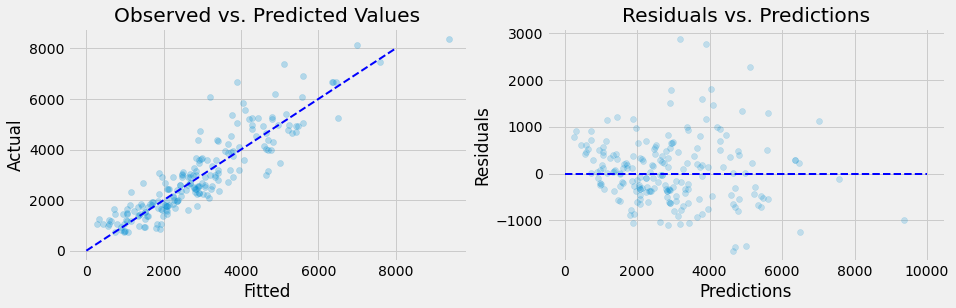

In [637]:
plt.figure(figsize=(14,4))

# Plotting predicted vs. observed
y_pred = LR.predict(X_val)
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_val, alpha=0.25)
plt.plot([0, 8000], [0,  8000],'k--', lw=2,color='blue')
plt.xlabel('Fitted')
plt.ylabel('Actual')
plt.title("Observed vs. Predicted Values")
plt.savefig("actual_vs_observed.pdf")

# Residuals
lm_residuals = y_val - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, lm_residuals, alpha=.2)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.plot([0,10000], [0, 0],'k--', lw=2,color='blue')
plt.title("Residuals vs. Predictions")
plt.savefig("residuals.pdf");


In [626]:
print(LR.intercept_)
print(LR.coef_)

6443.756192779034
[-5.96022062e+02  1.23247924e+02 -1.97059670e+02 -9.04857768e+02
 -1.20502684e+02 -6.06461805e+02  2.61090772e+02 -1.01021136e+02
 -5.72535108e+02  4.20300239e-10 -1.04948838e+02  4.22559185e+02
 -6.56087818e+02  6.07260766e+01  2.52088560e+03  2.11769720e+02
  2.34942053e+02  1.70530257e-13  2.42755578e+01 -2.12681629e+02
 -3.46396756e+02 -5.54857154e+02 -6.35648916e+02  2.84702950e+01
  1.72111416e+03 -2.57924938e+01 -2.74038560e+02  1.45206977e+02
  4.32271409e+02 -2.77647332e+02 -2.85713155e+02  2.28613822e+02
  5.70993329e+01 -9.09494702e-13  2.40093876e+01 -3.45034614e+02
  2.47524412e+02 -5.04624684e+02  9.49448230e+01 -1.75414278e+02
  7.82871441e+02 -1.24276488e+02  1.69444157e+02 -1.52692226e+02
 -7.65787247e+02  3.19538949e+02  2.05016883e+02  2.24479485e+02
 -5.87021861e+02  4.97547359e+02 -7.88633604e+02 -8.21627480e+02
  9.09494702e-13 -3.80774108e+02  5.79219138e+01  0.00000000e+00
 -6.17247628e+01  2.81004729e+02  2.27373675e-13  1.13101417e+03
  6.722

In [627]:
print(f'Linear Regression validation score :{LR.score(X_val,y_val):.4f}')

Linear Regression validation score :0.8098


####  Second model  polynomial regression :


In [673]:
poly =PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly=poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

poly_lr=LinearRegression()

In [674]:
poly_lr.fit(X_train_poly, y_train)


print(f'Polynomial Regression validation score: {poly_lr.score(X_val_poly,y_val):.4f}')

Polynomial Regression validation score: 0.8098


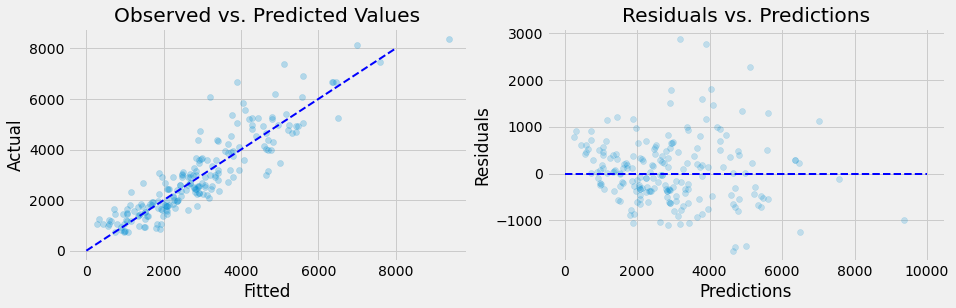

In [675]:
plt.figure(figsize=(14,4))

# Plotting predicted vs. observed
y_pred = poly_lr.predict(X_val_poly)
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_val, alpha=0.25)
plt.plot([0, 8000], [0,  8000],'k--', lw=2,color='blue')
plt.xlabel('Fitted')
plt.ylabel('Actual')
plt.title("Observed vs. Predicted Values")
plt.savefig("actual_vs_observed.pdf")

# Residuals
poly_residuals = y_val - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, poly_residuals, alpha=.2)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.plot([0,10000], [0, 0],'k--', lw=2,color='blue')
plt.title("Residuals vs. Predictions")
plt.savefig("residuals.pdf");


####  Thired model  ridge regression :


In [648]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)


In [668]:
lr_ridge=Ridge(alpha=11)
lr_ridge.fit(X_train_scaled,y_train)

Ridge(alpha=11)

In [669]:
print(f'Ridge Regression validation score: {lr_ridge.score(X_val_scaled, y_val):.4f}')


Ridge Regression validation score: 0.8137


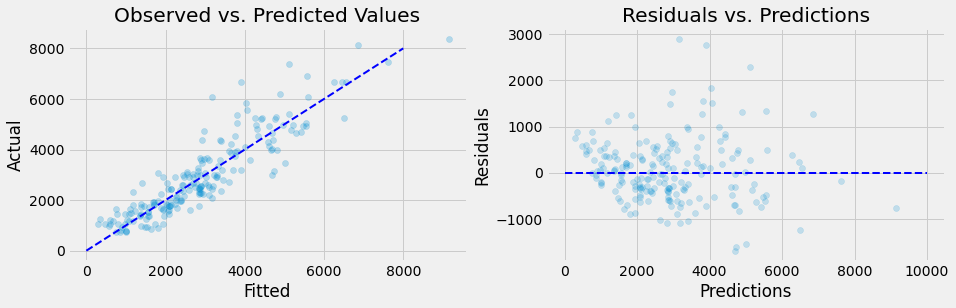

In [670]:
plt.figure(figsize=(14,4))

# Plotting predicted vs. observed
y_pred = lr_ridge.predict(X_val_scaled )
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_val, alpha=0.25)
plt.plot([0, 8000], [0,  8000],'k--', lw=2,color='blue')
plt.xlabel('Fitted')
plt.ylabel('Actual')
plt.title("Observed vs. Predicted Values")
plt.savefig("actual_vs_observed.pdf")

# Residuals
ridge_residuals = y_val - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, ridge_residuals, alpha=.2)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.plot([0,10000], [0, 0],'k--', lw=2,color='blue')
plt.title("Residuals vs. Predictions")
plt.savefig("residuals.pdf");


In [676]:
LR.fit(X_train, y_train)
print(f'Linear Regression val R^2 : {LR.score(X_val,y_val):.3f}')

lr_ridge.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lr_ridge.score(X_val_scaled, y_val):.3f}')

poly_lr.fit(X_train_poly, y_train)
print(f'Degree 1 polynomial regression val R^2: {poly_lr.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2 : 0.810
Ridge Regression val R^2: 0.814
Degree 1 polynomial regression val R^2: 0.810


Ridge Regression is the best model. 

In [635]:
lr_ridge.fit(X,y)
print(f'Ridge Regression validation score: {lr_ridge.score(X_test, y_test):.4f}')


Ridge Regression validation score: 0.8024


## Method 2: Cross-Validation / Test¶



In [636]:
from sklearn.model_selection import (cross_val_score, KFold, GridSearchCV)

Split Training Data into Multiple Folds¶


In [525]:

kfold = KFold(n_splits=5, shuffle=True, random_state=0)


 ### Linear Regression¶

In [527]:
LR = LinearRegression()

scores = cross_val_score(LR, X_train, y_train, cv=kfold)
print(scores)
print("Linear Mean Score: ", np.mean(scores))

# Build the Model
LR.fit(X_train, y_train)

[0.64846584 0.74383773 0.7239696  0.65908977 0.77336335]
Linear Reg Mean Score:  0.7097452570272506


LinearRegression()

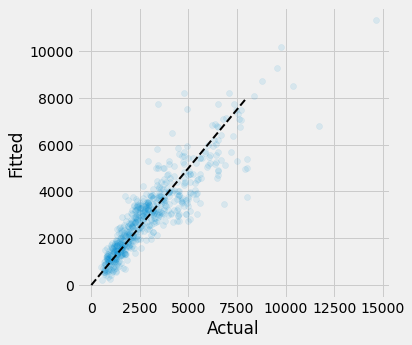

In [679]:
y_train_pred = LR.predict(X_train)
plt.ylabel('Fitted')
plt.xlabel('Actual')
plt.scatter(y_train, y_train_pred, alpha=0.1)
plt.plot([0, 8000], [0, 8000],'k--', lw=2)

### Lasso¶


Lasso Model:


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161838259.46184036, tolerance: 173856.92218537375
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168601285.3368153, tolerance: 172408.91511896532
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157519081.45904008, tolerance: 161002.3768440944
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150629026.12883183, tolerance: 165364.51485461846
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181438624.51530886, tolerance: 178052.36484632455
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161900828.27224144, tolerance: 173856.92218537375
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Convergence

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158006872.9219264, tolerance: 161002.3768440944
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151146608.1350077, tolerance: 165364.51485461846
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182025603.05146515, tolerance: 178052.36484632455
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWar

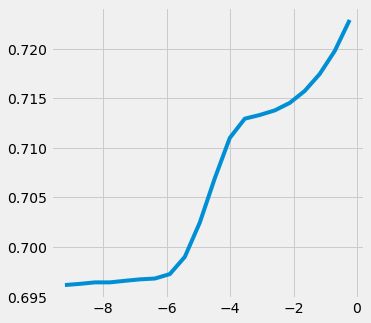

In [543]:

print("Lasso Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_test_score);

In [553]:
params['alpha']


array([1.00000000e-04, 1.60421716e-04, 2.57351270e-04, 4.12847324e-04,
       6.62296762e-04, 1.06246783e-03, 1.70442913e-03, 2.73427446e-03,
       4.38637001e-03, 7.03669004e-03, 1.12883789e-02, 1.81090112e-02,
       2.90507865e-02, 4.66037703e-02, 7.47625680e-02, 1.19935395e-01,
       1.92402418e-01, 3.08655261e-01, 4.95150067e-01, 7.94328235e-01])

In [554]:
grid_est.best_estimator_


Lasso(alpha=0.7943282347242815)

In [681]:
from sklearn.metrics import r2_score
r2_score(y_test, test_set_pred)

0.7562583982617239